In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 十二、Pandas绘图

- Series和DataFrame都有一个用于生成各类图表的plot方法
- Pandas的绘图是基于Matplotlib， 可以快速实现基本图形的绘制，复杂的图形还是需要用Matplotlib

常见可视化图形:

- 折线图
- 条形图/柱形图
- 饼图
- 散点图
- 箱型图
- 面积图
- 直方图

### 1、折线图

#### Series图表

<Axes: >

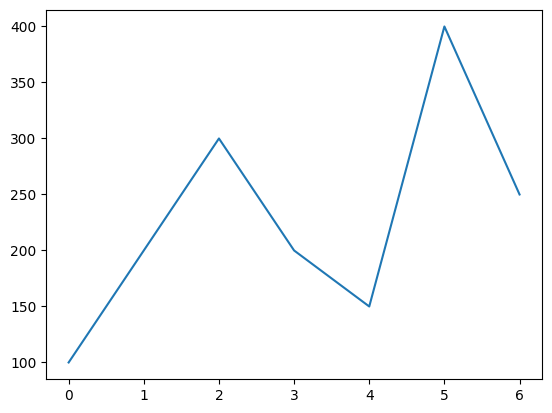

In [3]:
s = pd.Series([100, 200, 300, 200, 150, 400, 250])
s.plot()

- 正弦曲线

0.0    0.000000
0.1    0.099833
0.2    0.198669
0.3    0.295520
0.4    0.389418
         ...   
5.8   -0.464602
5.9   -0.373877
6.0   -0.279415
6.1   -0.182163
6.2   -0.083089
Length: 63, dtype: float64

<Axes: >

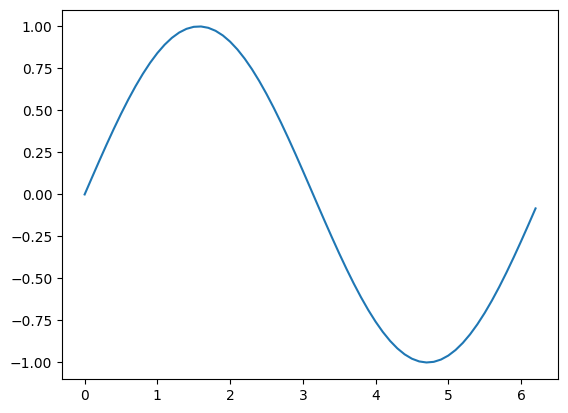

In [6]:
# sin曲线
x = np.arange(0, 2*np.pi, 0.1)
y = np.sin(x)
s = pd.Series(data=y, index=x)
display(s)
s.plot()

#### DataFrame图表
- 图例的位置可能会随着数据的不同而不同

In [7]:
data = np.random.randint(50, 100, size=(5, 6))
index = ['1st', '2nd', '3th', '4th', '5th']
columns = ['Jeff', 'Jack', 'Rose', 'Lucy', 'Lily', 'Bob']
df = pd.DataFrame(data=data, index=index, columns=columns)
df

,Jeff,Jack,Rose,Lucy,Lily,Bob
1st,71,98,82,66,86,97
2nd,84,97,61,73,91,85
3th,71,79,83,70,58,58
4th,83,73,75,82,52,94
5th,54,76,87,84,75,91


<Axes: >

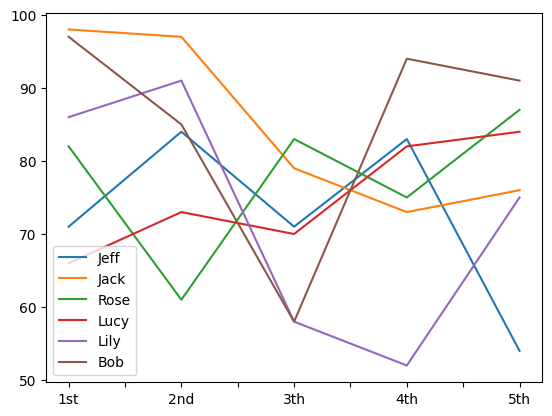

In [8]:
df.plot()  # 一列一根线

<Axes: >

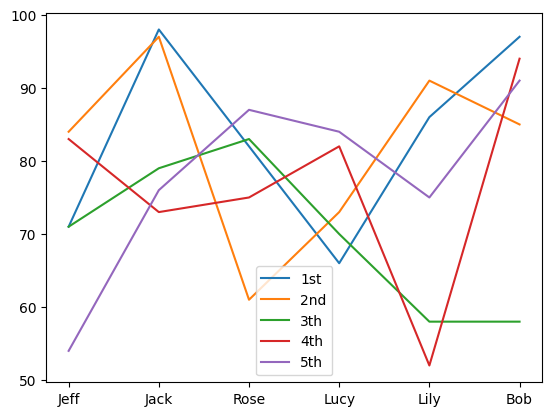

In [9]:
df.T.plot()  # 一行一根线

### 2、条形图/柱形图

- Series柱状图示例,kind = 'bar'/'barh'

<Axes: >

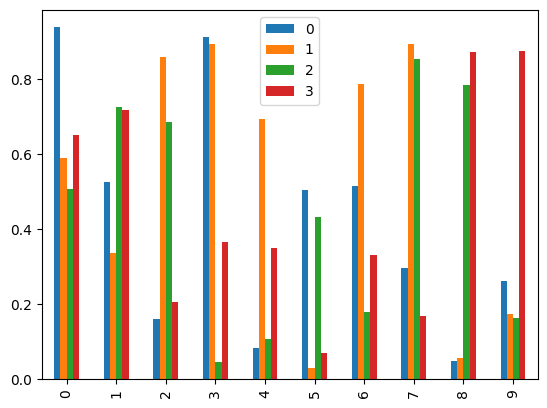

In [15]:
df = pd.DataFrame(data=np.random.rand(10, 4))
df.plot(kind='bar')  # 第一种方式
# df.plot.bar()  # 第二种方式
# df.plot.bar(stacked=True)  # 堆叠

<Axes: >

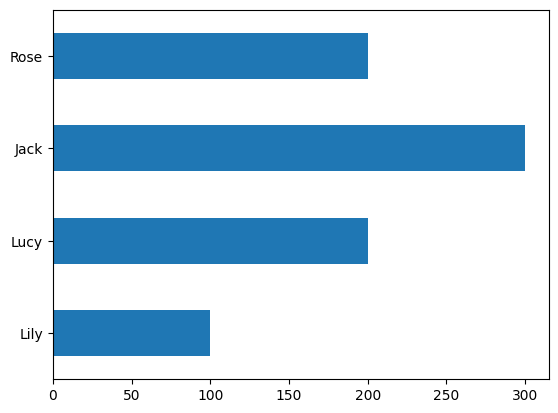

In [14]:
s = pd.Series(data=[100, 200, 300, 200])
s.index = ['Lily', 'Lucy', 'Jack', 'Rose']
# s.plot(kind='bar')  # 柱状图
s.plot(kind='barh')  # 水平：条形图


# kind : str
#     The kind of plot to produce:
#     - 'line' : line plot (default)
#     - 'bar' : vertical bar plot
#     - 'barh' : horizontal bar plot
#     - 'hist' : histogram
#     - 'box' : boxplot
#     - 'kde' : Kernel Density Estimation plot
#     - 'density' : same as 'kde'
#     - 'area' : area plot
#     - 'pie' : pie plot
#     - 'scatter' : scatter plot
#     - 'hexbin' : hexbin plot.

- DataFrame柱状图示例

In [16]:
data = np.random.randint(0, 100, size=(4, 3))
index = list("ABCD")
columns = ['Python', 'C', 'Java']

df = pd.DataFrame(data=data, index=index, columns=columns)
df

,Python,C,Java
A,83,76,54
B,10,57,68
C,76,82,16
D,79,61,43


<Axes: >

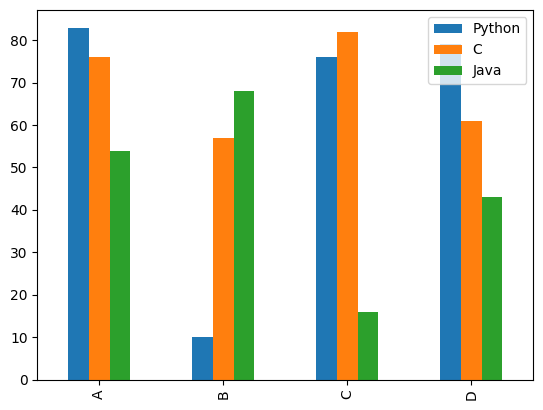

In [18]:
df.plot(kind='bar')
# df.plot(kind='barh')

#### 聚会规模可视化项目：

- 读取文件tips.csv，查看每天各种聚会规模的比例  
- 求和 df.sum()，注意灵活使用axis
- df.div(): 获取数dataframe和其他元素的浮点除法

In [19]:
tips = pd.read_csv('data/tips.csv')
tips

,day,1,2,3,4,5,6
0,Fri,1,16,1,1,0,0
1,Stat,2,53,18,13,1,0
2,Sun,0,39,15,18,3,1
3,Thur,1,48,4,5,1,3


- 把day作为行索引

In [21]:
tips2 = tips.set_index('day')
tips2

,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Stat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


- 求每天的聚会规模

In [24]:
day_sum = tips2.sum(axis=1)
day_sum

day
Fri     19
Stat    87
Sun     76
Thur    62
dtype: int64

- 每天各种聚会规模的比例

In [28]:
tips3 = tips2.div(day_sum,axis=0)
tips3

,1,2,3,4,5,6
day,,,,,,
Fri,0.052632,0.842105,0.052632,0.052632,0.000000,0.000000
Stat,0.022989,0.609195,0.206897,0.149425,0.011494,0.000000
Sun,0.000000,0.513158,0.197368,0.236842,0.039474,0.013158
Thur,0.016129,0.774194,0.064516,0.080645,0.016129,0.048387


<Axes: xlabel='day'>

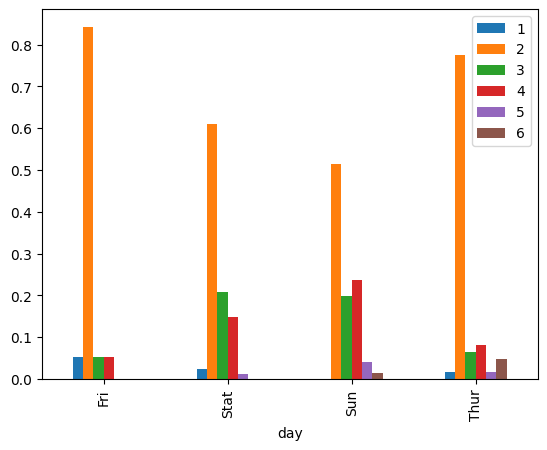

In [29]:
tips3.plot(kind='bar')

### 直方图

rondom生成随机数百分比直方图，调用hist方法

- 柱高表示数据的频数，柱宽表示各组数据的组距
- 参数bins可以设置直方图方柱的个数上限，越大柱宽越小，数据分组越细致
- 设置density参数为True，可以把频数转换为概率

<Axes: ylabel='Frequency'>

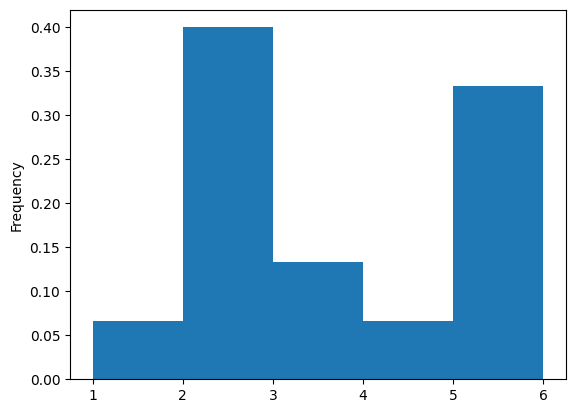

In [30]:
s = pd.Series([1, 2, 2, 2, 2, 2, 2, 3, 3, 4, 5, 5, 5, 6, 6])

# 直方图
# bins=4 表式4个组
# density: 频数转换为概率
s.plot(kind='hist', bins=5, density=True)

- kde图：核密度估计，用于弥补直方图由于参数bins设置的不合理导致的精度缺失问题

<Axes: ylabel='Density'>

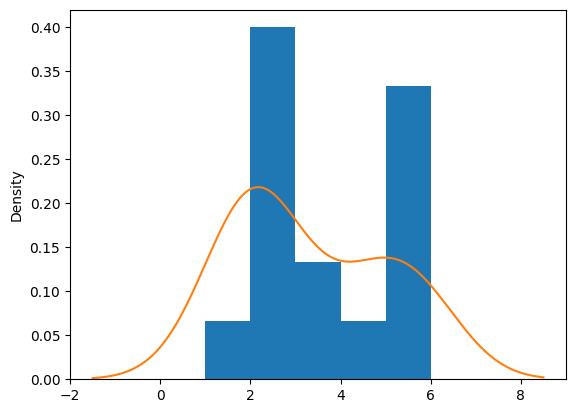

In [32]:
# kde图：核密度估计
s.plot(kind='hist', bins=5, density=True)

s.plot(kind='kde')  # 可以结合上面的直方图一起显示，效果更好

### 饼图

In [33]:
df = pd.DataFrame(data=np.random.rand(4, 2), 
                             index=list('ABCD'),
                              columns=['Python', 'Java']
                 )
df

,Python,Java
A,0.652832,0.729814
B,0.186564,0.072446
C,0.084813,0.350407
D,0.402285,0.918343


array([<Axes: ylabel='Python'>, <Axes: ylabel='Java'>], dtype=object)

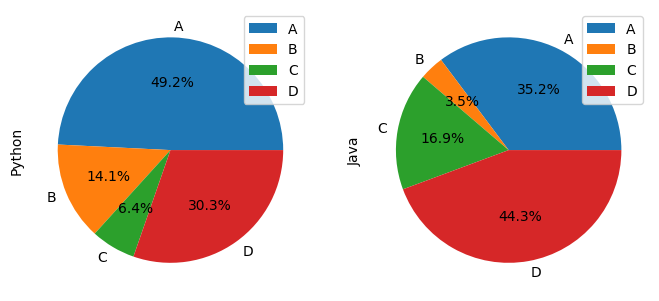

In [35]:
# 画饼图
# df['Python'].plot(kind='pie', autopct='%.1f%%')

# subplots: 子图
df.plot.pie(subplots=True, figsize=(8, 8), autopct='%.1f%%')

# pandas画图：快速画简单的图
# 复杂的图可以用matplotlib

### 散点图

- 散点图是观察两个一维数据数列之间的关系的有效方法,DataFrame对象可用 

In [36]:
data = np.random.normal(size=(1000, 2))
data

df = pd.DataFrame(data=data, columns=list('AB'))
df.head()

,A,B
0,-1.585213,0.489228
1,-0.837127,-0.489179
2,-2.368364,1.202884
3,-0.321906,0.339208
4,-1.335697,-0.612185


<Axes: xlabel='A', ylabel='B'>

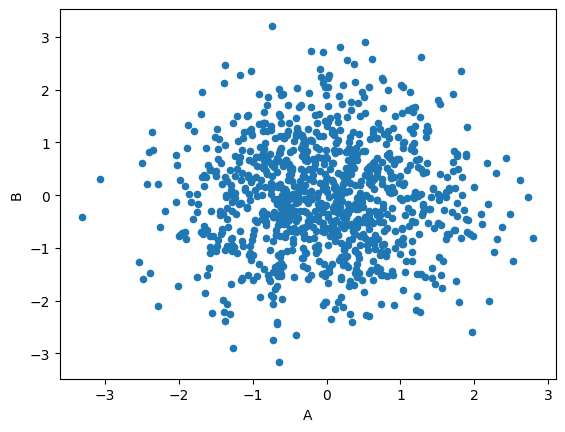

In [38]:
# df.plot(kind='scatter', x='A', y='B')

# x='A' : 使用A列作为X轴
# y='B' : 使用B列作为Y轴
df.plot.scatter(x='A', y='B')

### 面积图

In [39]:
df = pd.DataFrame(data=np.random.rand(10, 4), columns=list('ABCD'))
df

,A,B,C,D
0,0.327525,0.031517,0.082003,0.004819
1,0.933135,0.462612,0.860626,0.899966
2,0.091611,0.157617,0.469927,0.572048
3,0.126059,0.113065,0.629704,0.832895
4,0.050729,0.383174,0.396490,0.396822
5,0.568701,0.497077,0.609382,0.402655
6,0.964694,0.495723,0.475175,0.157512
7,0.107108,0.817299,0.381252,0.061124
8,0.730342,0.406903,0.547521,0.434871
9,0.585655,0.870123,0.164690,0.141501


<Axes: >

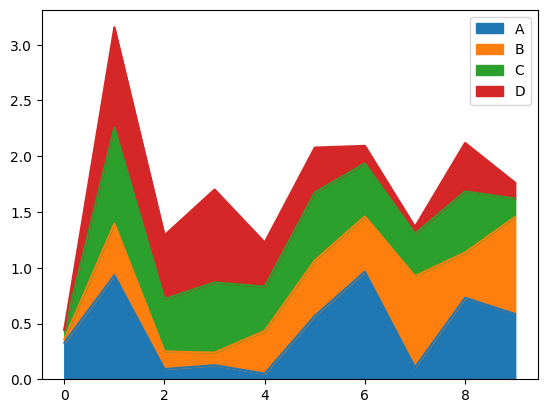

In [43]:
# df.plot(kind='area')
df.plot.area(stacked=True)  # 堆叠

### 箱型图

In [44]:
df = pd.DataFrame(data=np.random.rand(10, 4), columns=list('ABCD'))
df

,A,B,C,D
0,0.756911,0.836414,0.264900,0.705693
1,0.140788,0.471446,0.974703,0.678969
2,0.009803,0.768064,0.217437,0.529829
3,0.151886,0.520291,0.586129,0.061461
4,0.355901,0.395727,0.877874,0.117456
5,0.349402,0.467710,0.441937,0.706485
6,0.935980,0.098286,0.954653,0.184465
7,0.746639,0.693339,0.143870,0.362331
8,0.519535,0.171695,0.684346,0.544470
9,0.905950,0.849997,0.321288,0.977740


<Axes: >

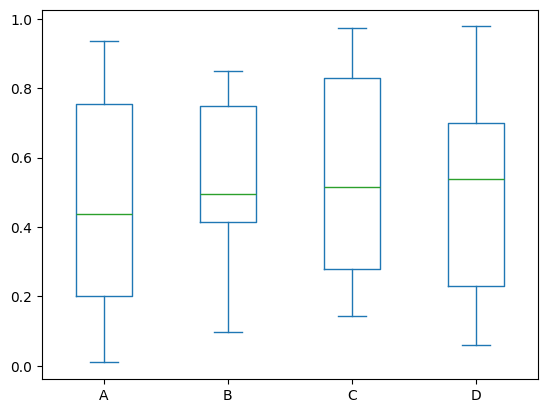

In [45]:
# df.plot(kind='box')
df.plot.box()

#  最大值
#  75%
#  50%
#  25%
#  最小值

# 圆点：表式异常值，离群点